In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Assuming the smoking healthcare data is in a CSV file named 'smoking_health_data_final.csv'
data = pd.read_csv('smoking_health_data_final.csv')

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Get a summary of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Descriptive statistics of numerical columns
print(data.describe())

   age   sex current_smoker  heart_rate blood_pressure  cigs_per_day   chol
0   54  male            yes          95         110/72           NaN  219.0
1   45  male            yes          64         121/72           NaN  248.0
2   58  male            yes          81       127.5/76           NaN  235.0
3   42  male            yes          90       122.5/80           NaN  225.0
4   42  male            yes          62         119/80           NaN  226.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), obj

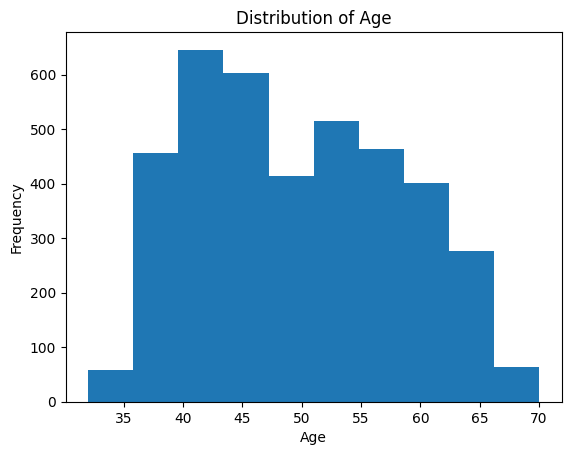

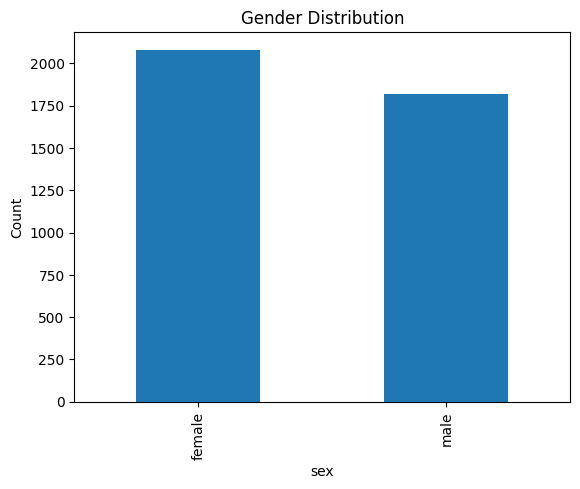

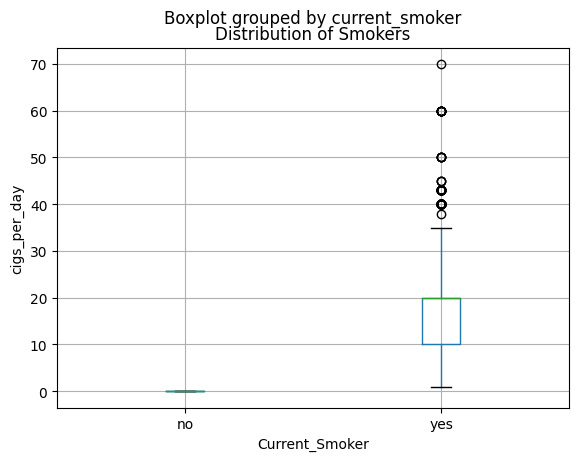

In [ ]:
# Histogram of a numerical column
plt.hist(data['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart of a categorical column
gender_counts = data['sex'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()

# Box plot to identify outliers
data.boxplot(column='cigs_per_day', by='current_smoker')
plt.title('Distribution of Smokers')
plt.xlabel('Current_Smoker')
plt.ylabel('cigs_per_day')
plt.show()

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

# Fill missing values with the mean of the column
data['age'].fillna(data['age'].mean(), inplace=True)
data['cigs_per_day'].fillna(data['cigs_per_day'].mean(), inplace=True)


In [ ]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Print the first few rows of the encoded dataset
print(data.head())


    age  heart_rate  cigs_per_day   chol  sex_male  current_smoker_yes  \
14   48          75           0.0  175.0      True               False   
15   58          75           0.0  240.0     False               False   
16   46          80           0.0  199.0     False               False   
17   45          75           0.0  235.0     False               False   
18   37          81           0.0  300.0     False               False   

    blood_pressure_100.5/66  blood_pressure_100.5/69  blood_pressure_100/60  \
14                    False                    False                  False   
15                    False                    False                  False   
16                    False                    False                  False   
17                    False                    False                  False   
18                    False                    False                  False   

    blood_pressure_100/61.5  ...  blood_pressure_98/66  blood_pressure_98/67  \


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the numerical columns
data[['age', 'cigs_per_day','heart_rate']] = scaler.fit_transform(data[['age', 'cigs_per_day','heart_rate']])

# Print the first few rows of the scaled dataset
print(data.head())


        age   sex current_smoker  heart_rate blood_pressure  cigs_per_day  \
0  0.578947  male            yes    0.515152         110/72           NaN   
1  0.342105  male            yes    0.202020         121/72           NaN   
2  0.684211  male            yes    0.373737       127.5/76           NaN   
3  0.263158  male            yes    0.464646       122.5/80           NaN   
4  0.263158  male            yes    0.181818         119/80           NaN   

    chol  
0  219.0  
1  248.0  
2  235.0  
3  225.0  
4  226.0  


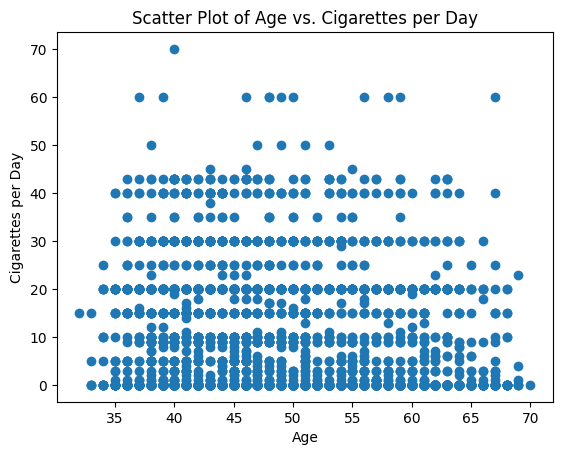

In [ ]:
# Scatter plot to visualize the relationship between age and cigs_per_day
plt.scatter(data['age'], data['cigs_per_day'])
plt.title('Scatter Plot of Age vs. Cigarettes per Day')
plt.xlabel('Age')
plt.ylabel('Cigarettes per Day')
plt.show()


In [ ]:
data.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [ ]:
data[['age','chol']].corr()

,age,chol
age,1.00000,0.25548
chol,0.25548,1.00000


In [ ]:
data[['age','heart_rate']].corr()

,age,heart_rate
age,1.000000,-0.012702
heart_rate,-0.012702,1.000000


In [ ]:
data[['age','cigs_per_day']].corr()

,age,cigs_per_day
age,1.000000,-0.192625
cigs_per_day,-0.192625,1.000000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data[['age','cigs_per_day','heart_rate','chol']].corr()

,age,cigs_per_day,heart_rate,chol
age,1.000000,-0.192625,-0.012702,0.255480
cigs_per_day,-0.192625,1.000000,0.072296,-0.027454
heart_rate,-0.012702,0.072296,1.000000,0.093696
chol,0.255480,-0.027454,0.093696,1.000000


<Axes: >

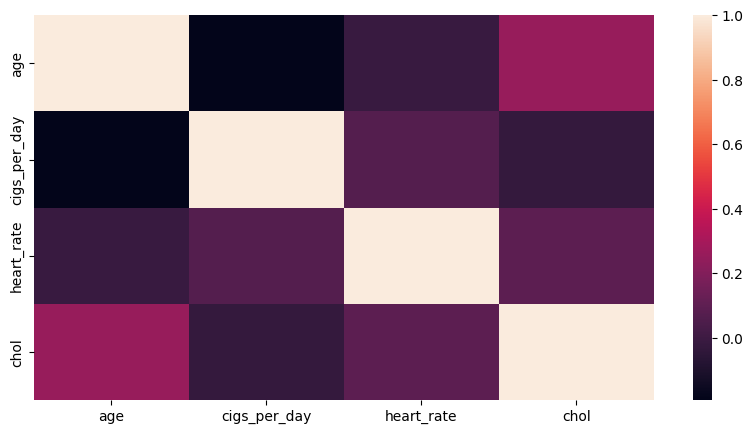

In [ ]:
cor = data[['age','cigs_per_day','heart_rate','chol']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor)